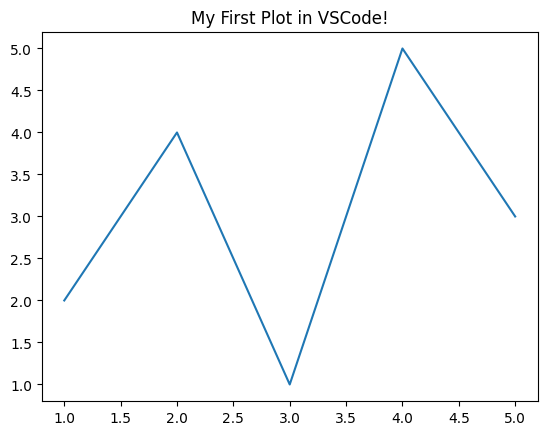

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 1, 5, 3]}
df = pd.DataFrame(data)

plt.plot(df['x'], df['y'])
plt.title('My First Plot in VSCode!')
plt.show()

In [96]:
data = pd.read_csv('synthetic_coffee_health_10000.csv')
print(data.head())
print(data.info())
print(data.describe())
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()}")

   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0           NaN      Other        0                    0 

In [97]:
import seaborn as sns
import numpy as np
print(data.dtypes)
print(data["Sleep_Quality"].unique())
mapper = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}
data["Sleep_Quality"] = data["Sleep_Quality"].map(mapper)
print(data["Health_Issues"].value_counts())
print(data)


ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object
['Good' 'Fair' 'Excellent' 'Poor']
Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
         ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0         1   40    Male  Germany            3.5        328.1          7.5   
1         2   33    Male  Germany            1.0         94.1          6.2   
2         3   42    Male   Brazil            5.3        503.7     

In [ ]:
print(data)
print(data["Stress_Level"].value_counts())
print(data["Gender"].value_counts())
print(data["Country"].value_counts())
print(data["Occupation"].value_counts())
print(data["Health_Issues"].value_counts())
health_mapper = {
    "Low": 1,
    "Medium": 2, 
    "High": 3
}
health_issues_mapper = {
    "Mild": 1,
    "Moderate": 2, 
    "Severe": 3
}
data["Health_Issues"] = data["Health_Issues"].map(health_issues_mapper)
data["Stress_Level"] = data["Stress_Level"].map(health_mapper)
data_genders = pd.get_dummies(data['Gender'], dtype = int)
data = pd.concat([data, data_genders], axis = 1)
data = data.drop(columns = ['Gender'])
for i in data.columns:
    if data[i].dtype == 'object' or data[i].dtype == 'str':
        print(i)
print(data)
cols = data.columns.tolist()
cols = cols.insert(0, cols.pop(cols.index("Gender")))
data = data[cols]

         ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0         1   40    Male  Germany            3.5        328.1          7.5   
1         2   33    Male  Germany            1.0         94.1          6.2   
2         3   42    Male   Brazil            5.3        503.7          5.9   
3         4   53    Male  Germany            2.6        249.2          7.3   
4         5   32  Female    Spain            3.1        298.0          5.3   
...     ...  ...     ...      ...            ...          ...          ...   
9995   9996   50  Female    Japan            2.1        199.8          6.0   
9996   9997   18  Female       UK            3.4        319.2          5.8   
9997   9998   26    Male    China            1.6        153.4          7.1   
9998   9999   40  Female  Finland            3.4        327.1          7.0   
9999  10000   42  Female   Brazil            2.9        277.5          6.4   

      Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Ac